# Customer Segmentation

## Objective : To increase marketing efficiency by exploring the Retail Store Data and coming up with insights to build a data driven business strategies

## Motivation: Current company, understanding the problem statement of customers, segementing accordingly, what should be done to retain customers.

## Approach:
#### 1. Data quality check
#### 2. Data cleaning
#### 3. EDA  such as order count, best selling period, revenue per month(line plot), orders per month(line plot), etc
#### 4. Studying a new "RFM-Metric" metric and building the same to segment customers. In RFM-Metric,"R" stands for Recency, "F" for Frequency and "M' for Monetary. I've used Quantiles to segment them accordingly.
#### 5. Model Building (K-Means Clustering model) findling the best value for k using "Elbow-Method"


In [1]:
import pandas as pd 
import numpy as np

In [2]:
file_path ='D:/Imarticus/Sreemanto Sir/Data_sets/'
file_name = 'Online Retail.xlsx'

df=pd.read_excel(file_path+file_name)

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#investigating the Null Customers Id 
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [5]:
#Sorting by quantity 
df[df['CustomerID'].isnull()].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom


As the sorting result displays -ve values in quantity which indicates that this might be return orders

Not necessary that return can only be applicable where CustomerId is null so now we have two aspect to check -ve value where id is null as well as where it is not null.

#### Lets find out the return orders where the customer_id is null 

In [6]:
null_customers_df = df[df['CustomerID'].isnull()]
null_id_orders = null_customers_df[null_customers_df["Quantity"]<0].InvoiceNo.nunique()
print("Total return orders where the customer_id is null = ",null_id_orders)

Total return orders where the customer_id is null =  1518


#### Lets find out the total return orders

In [7]:
total_return=df[df['Quantity']<0].InvoiceNo.nunique()
print("Total number of Return Orders = ",total_return)

Total number of Return Orders =  5172


#### Let's see the order count country wise 

In [8]:
import matplotlib.pyplot as plt

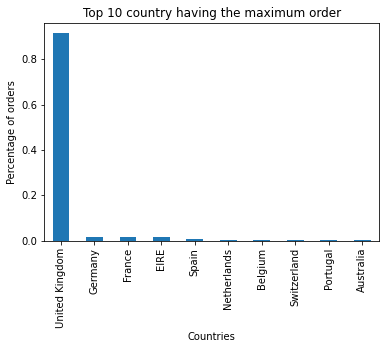

In [9]:
df['Country'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Percentage of orders')
plt.title('Top 10 country having the maximum order')
plt.show()

From this we can conclude that more than 90% orders are from UK 

In [10]:
#Restricting the Data only for UK
df= df[df['Country']=='United Kingdom']

#Restricting the Data where quantity > 0
df=df[df['Quantity']>0]




In [11]:
#Convert the date into DateTime object. Print the max and min date.
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year

In [12]:
#converting from integers to strings
df['Month'] = df['Month'].astype('str')
df['Year'] = df['Year'].astype('str')

df['Month-Year_wise']=df['Month']+"-"+df['Year']

Drop record where CustomerID is null

Drop record where Unitprice is less than 0

Create a revenue field (Revenue = Quantity * Unit Price)

In [13]:
df=df[df['CustomerID'].notnull()]

In [14]:
df['Revenue']=df['Quantity']*df['UnitPrice']

#### Aggregating the Orders by Month

In [15]:
print("The minimum date is : ",df['InvoiceDate'].min().date())
print("The minimum date is : ",df['InvoiceDate'].max().date())

The minimum date is :  2010-12-01
The minimum date is :  2011-12-09


So we have around 1 year of data 

In [16]:
df['InvoiceDate'].max().date()

datetime.date(2011, 12, 9)

In [17]:
df['InvoiceDate'].min().date()

datetime.date(2010, 12, 1)

In [18]:
df['Month'] = df['Month'].astype('int')
df['Year'] = df['Year'].astype('int')
df_month_agg = df.groupby('Month-Year_wise',as_index=False).agg({'InvoiceNo': 'nunique',
                                                                  'Revenue':'sum',
                                                                'Year':'first',
                                                                'Month':'first'}).rename(columns={'InvoiceNo':'No. of Orders'})

df_month_agg = df_month_agg.sort_values(by=['Year','Month'])

#### Create Month wise Quatity plot (line plot)


In [19]:
df_month_agg[['Month-Year_wise','No. of Orders']].head(5)

,Month-Year_wise,No. of Orders
3,12-2010,1291
0,1-2011,874
5,2-2011,897
6,3-2011,1177
7,4-2011,1058


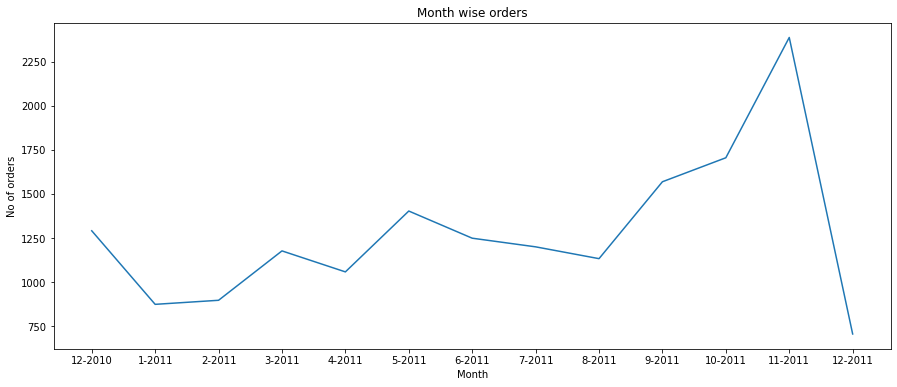

In [20]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg['Month-Year_wise'],df_month_agg['No. of Orders'])
plt.xlabel('Month')
plt.ylabel('No of orders')
plt.title('Month wise orders')
plt.savefig('Month wise orders.png')
plt.show()

#### Create Month wise Revenue plot (line plot)

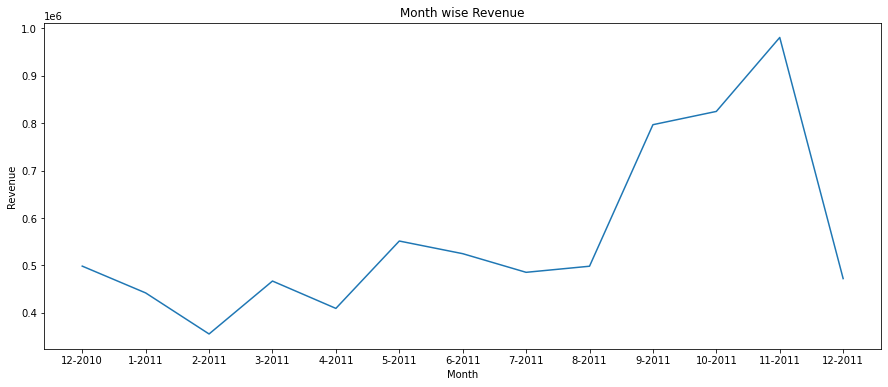

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df_month_agg['Month-Year_wise'],df_month_agg['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Month wise Revenue')
plt.savefig('Month wise Revenue.png')
plt.show()

### Recency

In [22]:
last_date=pd.datetime(2011,12,9)

<ipython-input-22-1093656f6a40>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  last_date=pd.datetime(2011,12,9)


In [23]:
last_date

datetime.datetime(2011, 12, 9, 0, 0)

In [24]:
df_recency = df.groupby('CustomerID',as_index=False).agg({'InvoiceDate':'max'})
df_recency['Recency']=(last_date-df_recency['InvoiceDate']).dt.days  #aaj ke din se customer ne kitne din pehle order kara tha 
df_recency['Recency'].replace([-1],[0],inplace=True)
df_recency

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,324
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,2
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276
3917,18281.0,2011-06-12 10:53:00,179
3918,18282.0,2011-12-02 11:43:00,6
3919,18283.0,2011-12-06 12:02:00,2


### Frequency-Monetary

In [25]:
df_FM=df.groupby('CustomerID',as_index=False).agg({'InvoiceNo':'nunique',
                                            'Revenue':'sum'})

In [26]:
df_RFM=pd.merge(df_recency,df_FM,on='CustomerID',how='inner')

In [27]:
df_RFM.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [29]:
df_RFM.rename(columns={'Revenue':'Monetary'},inplace=True)

In [30]:
#df_RFM.drop(columns='InvoiceDate',inplace=True)
df_RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60
3917,18281.0,2011-06-12 10:53:00,179,1,80.82
3918,18282.0,2011-12-02 11:43:00,6,2,178.05
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88


#### Modeling Data : RFM Quantiles

Understanding Recency, Frequency, Monetary Value
The RFM model is based on three quantitative factors:


Recency: How recently a customer has made a purchase
Frequency: How often a customer makes a purchase
Monetary Value: How much money a customer spends on purchases


Now we split the metric into segments using Quantiles.We will asign scores from 1-4 to each recency frequency and monetary respectively.

1 is the highest value and 4 is the lowest value.

Our final RFM score is calculated simply by combining indivisual RFM scores

In [31]:
Quantiles = df_RFM.quantile(q=[0.25,0.5,0.75])
Quantiles = Quantiles.to_dict()
Quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 141.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8200000000002,
  0.75: 1575.8900000000003}}

In [32]:
segmented_RFM=df_RFM.copy()


In [33]:
def RScore(data,key,Quantiles):
    if data<= Quantiles[key][0.25]:
        return 1 
    elif data<= Quantiles[key][0.50]:
        return 2 
    elif data<= Quantiles[key][0.75]:
        return 3 
    else:
        return 4 
    
def FMScore(data,key,Quantiles):
    if data<= Quantiles[key][0.25]:
        return 4 
    elif data<= Quantiles[key][0.50]:
        return 3 
    elif data<= Quantiles[key][0.75]:
        return 2 
    else:
        return 1 

In [34]:
segmented_RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,324,1,77183.60
1,12747.0,2011-12-07 14:34:00,1,11,4196.01
2,12748.0,2011-12-09 12:20:00,0,210,33719.73
3,12749.0,2011-12-06 09:56:00,2,5,4090.88
4,12820.0,2011-12-06 15:12:00,2,4,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60
3917,18281.0,2011-06-12 10:53:00,179,1,80.82
3918,18282.0,2011-12-02 11:43:00,6,2,178.05
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88


In [35]:
#apply- everytime we have a sequence like list, array, series, pd columns
#and we want to apply a function in each element of the sequence
segmented_RFM['Recency_quartile']=segmented_RFM['Recency'].apply(RScore,args=('Recency',Quantiles))
segmented_RFM['Frequency_quartile']=segmented_RFM['Frequency'].apply(FMScore,args=('Frequency',Quantiles))
segmented_RFM['Monetary_quartile']=segmented_RFM['Monetary'].apply(FMScore,args=('Monetary',Quantiles))
segmented_RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile
0,12346.0,2011-01-18 10:01:00,324,1,77183.60,4,4,1
1,12747.0,2011-12-07 14:34:00,1,11,4196.01,1,1,1
2,12748.0,2011-12-09 12:20:00,0,210,33719.73,1,1,1
3,12749.0,2011-12-06 09:56:00,2,5,4090.88,1,2,1
4,12820.0,2011-12-06 15:12:00,2,4,942.34,1,2,2
...,...,...,...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60,4,4,4
3917,18281.0,2011-06-12 10:53:00,179,1,80.82,4,4,4
3918,18282.0,2011-12-02 11:43:00,6,2,178.05,1,3,4
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88,1,1,1


In [36]:
segmented_RFM['RFM_Score']=segmented_RFM['Recency_quartile'].map(str)+segmented_RFM['Frequency_quartile'].map(str)+segmented_RFM['Monetary_quartile'].map(str)

In [37]:
segmented_RFM

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile,RFM_Score
0,12346.0,2011-01-18 10:01:00,324,1,77183.60,4,4,1,441
1,12747.0,2011-12-07 14:34:00,1,11,4196.01,1,1,1,111
2,12748.0,2011-12-09 12:20:00,0,210,33719.73,1,1,1,111
3,12749.0,2011-12-06 09:56:00,2,5,4090.88,1,2,1,121
4,12820.0,2011-12-06 15:12:00,2,4,942.34,1,2,2,122
...,...,...,...,...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60,4,4,4,444
3917,18281.0,2011-06-12 10:53:00,179,1,80.82,4,4,4,444
3918,18282.0,2011-12-02 11:43:00,6,2,178.05,1,3,4,134
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88,1,1,1,111


In [38]:

segmented_RFM[segmented_RFM['RFM_Score']=="111"].shape[0]

423

In [39]:
print('Best Customer: ',segmented_RFM[segmented_RFM['RFM_Score']=="111"].shape[0])

Best Customer:  423


In [40]:
#f-quartile indicates he has purchase more number of times, 4 indicates low number of time 
print('Loyal/frequent Customer: ',segmented_RFM[segmented_RFM['Frequency_quartile']==1].shape[0])

Loyal/frequent Customer:  791


In [41]:
print('big spenders Customer: ',segmented_RFM[segmented_RFM['Monetary_quartile']==1].shape[0])

big spenders Customer:  980


In [42]:
print('Almost lost customers: ',segmented_RFM[segmented_RFM['RFM_Score']=="134"].shape[0])

Almost lost customers:  31


In [43]:
print('lost customers: ',segmented_RFM[segmented_RFM['RFM_Score']=="334"].shape[0])

lost customers:  35


In [44]:
print('bad customers: ',segmented_RFM[segmented_RFM['RFM_Score']=="444"].shape[0])

bad customers:  396


In [45]:
Label=[0]*len(segmented_RFM)


for i in range(0,len(segmented_RFM)):
    
    if segmented_RFM['RFM_Score'][i]=='111':
        Label[i]='Best Customer'
        
    elif segmented_RFM['RFM_Score'][i]=='134':
        Label[i]='Almost Lost Customer'
        
    elif segmented_RFM['RFM_Score'][i]=='344':
        Label[i]='Lost Customer'   
        
    elif segmented_RFM['RFM_Score'][i]=='444':
        Label[i]='bad-lost Customer'
        
    elif segmented_RFM['Frequency_quartile'][i]==1:
        Label[i]='Loyal Customer'
        
    elif segmented_RFM['Monetary_quartile'][i]==1:
        Label[i]='Big spenders Customer'
        
    else:
        Label[i]="Others"

In [46]:
segmented_RFM["category"]=Label

In [47]:
segmented_RFM.category.value_counts()

Others                   2203
Best Customer             423
bad-lost Customer         396
Loyal Customer            368
Big spenders Customer     313
Lost Customer             187
Almost Lost Customer       31
Name: category, dtype: int64

In [48]:
import seaborn as sns 

In [49]:

Cust_df=segmented_RFM.groupby('category')['CustomerID'].nunique().sort_values(ascending=False).reset_index()

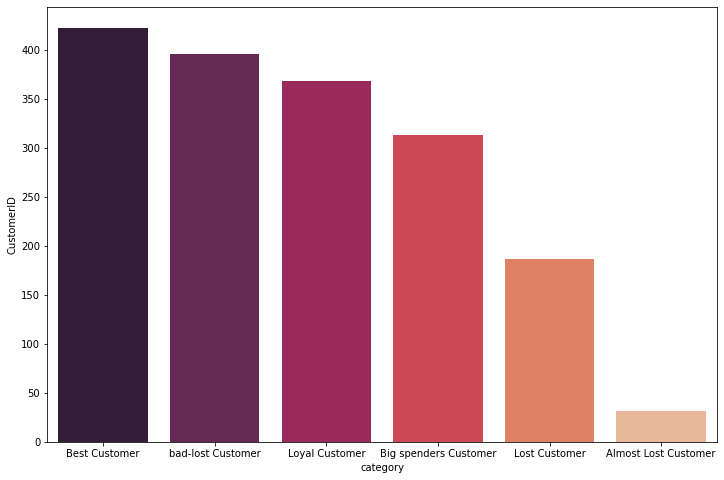

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(data=Cust_df.drop([0]),x='category',y='CustomerID',palette='rocket')
plt.savefig("Customer Segments via RFM.png")


In [51]:
#Scaling 
RFM_table = segmented_RFM[['Recency', 'Frequency', 'Monetary']]

#adding 1 to avoid 0 whose log value can lead to infinity
RFM_log_table = np.log(RFM_table+1)


In [52]:
import feature_engine
from feature_engine.outliers import Winsorizer



In [53]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )

windsoriser.fit(RFM_log_table)

RFM_log_table = windsoriser.transform(RFM_log_table)

In [54]:
#Developing preprocessing with StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(RFM_log_table)

RFM_Table_New_scaled = scaler.transform(RFM_log_table)


C:\Users\SHRUTI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

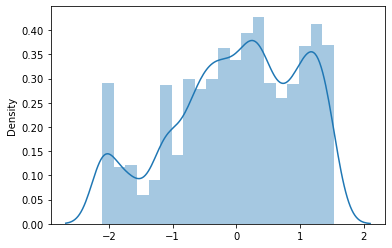

In [55]:
#Analyze Recency distribution
sns.distplot(RFM_Table_New_scaled[:,0])

C:\Users\SHRUTI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

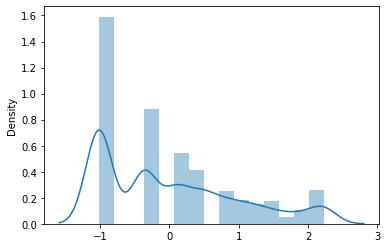

In [56]:
#Analyze Frequency distribution
sns.distplot(RFM_Table_New_scaled[:,1])



C:\Users\SHRUTI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

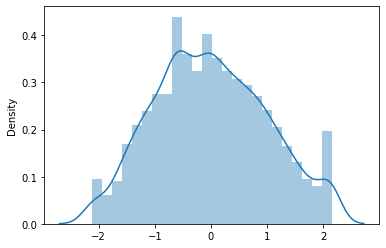

In [57]:
#Analyze Monetary distribution
sns.distplot(RFM_Table_New_scaled[:,2])


In [58]:
from sklearn.cluster import KMeans

range_of_clusters = 16

X = np.asarray(RFM_Table_New_scaled)
Sum_of_squared_distances = []
K = range(1,range_of_clusters)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

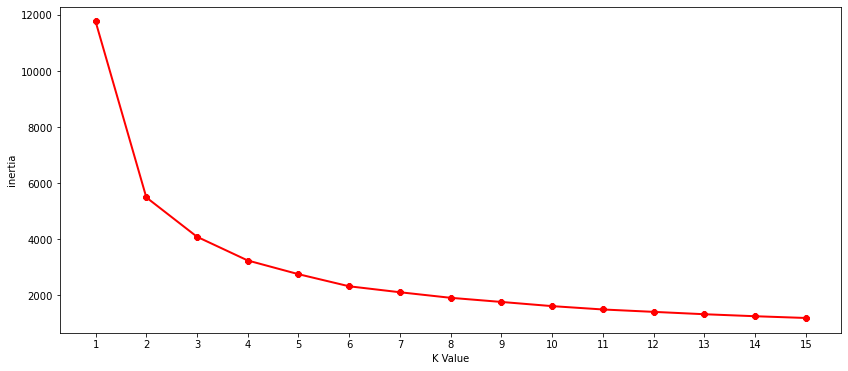

In [59]:
plt.figure(figsize=(14,6))    
plt.plot(range(1,range_of_clusters),Sum_of_squared_distances, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,range_of_clusters,1))
plt.ylabel("inertia")
plt.savefig("Elbow_plot.png")
plt.show()

In [60]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
   
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
       
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
       
    return df_new

In [61]:
#plt.figure(figsize=(10, 10))

#plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, segmented_RFM)

#plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, segmented_RFM)

#plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, segmented_RFM)

#plt.tight_layout()


In [62]:
df_rfm_k4

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Recency_quartile,Frequency_quartile,Monetary_quartile,RFM_Score,category,Cluster
0,12346.0,2011-01-18 10:01:00,324,1,77183.60,4,4,1,441,Big spenders Customer,1
1,12747.0,2011-12-07 14:34:00,1,11,4196.01,1,1,1,111,Best Customer,0
2,12748.0,2011-12-09 12:20:00,0,210,33719.73,1,1,1,111,Best Customer,0
3,12749.0,2011-12-06 09:56:00,2,5,4090.88,1,2,1,121,Big spenders Customer,0
4,12820.0,2011-12-06 15:12:00,2,4,942.34,1,2,2,122,Others,0
...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,276,1,180.60,4,4,4,444,bad-lost Customer,2
3917,18281.0,2011-06-12 10:53:00,179,1,80.82,4,4,4,444,bad-lost Customer,2
3918,18282.0,2011-12-02 11:43:00,6,2,178.05,1,3,4,134,Almost Lost Customer,3
3919,18283.0,2011-12-06 12:02:00,2,16,2094.88,1,1,1,111,Best Customer,0


In [63]:
customer_count=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
customer_count

,Cluster,CustomerID
0,2,1371
1,1,1056
2,0,766
3,3,728


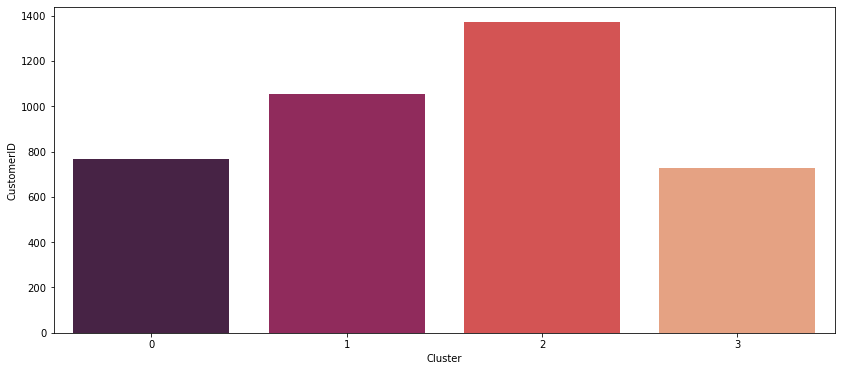

In [64]:
plt.figure(figsize=(14,6))
sns.barplot(data=customer_count, x="Cluster", y="CustomerID", palette = "rocket")
plt.savefig("Clusters.png")

In [65]:
#Profiling our custers

def cluster_profiling(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'CustomerID':'nunique'
    }).round(0)
   
    return df_new

In [66]:
cluster_profiling(df_rfm_k4)

,Recency,Frequency,Monetary,CustomerID
Cluster,,,,
0,11.0,12.0,6360.0,766
1,75.0,4.0,1583.0,1056
2,185.0,1.0,311.0,1371
3,19.0,2.0,466.0,728


# Final Interpretation

## Cluster Interpretation

### Cluster 0 : Represents the best customers who visit the store frequently and are big spenders

### Cluster 1 : Represents customers who were good customers and used to visit the store frequently but have not visited recently
   
### Cluster 2 : Represents lost customers who visited the store long back and only a selective times
   
### Cluster 3 : Represents new customers who recently started visiting our store.
   
# Business Action

### 1. Take feedback from customers from cluster 1 understand why they stopped visiting as they account for nearly 25% of the entire customer base

### 2. Study the purchase pattern from customers falling in cluster 0 and try to implement the same startegy to cluster 3 for customer retention